# Slices Alignment with PASTE

This notebook demonstrates the process of Aligning spatial transcriptomics data. This is done in the following two steps:

1. Align spatial transcriptomics data from a set of multi-slices;
2. Reduce the amount of data by sampling to improve alignment speed.

 Here we modified a published method PASTE, which utilized Fused Gromov-Wasserstein Optimal Transport (FGW-OT) algorithm, to leverages
 both gene expression similarity and spatial distances between spots to align and integrate spatial transcriptomics data.

 **Reference**: Ron Zeira, Max Land, Benjamin J. Raphael. Alignment and Integration of Spatial Transcriptomics Data. bioRxiv, 2021.03.16.435604.
                doi: https://doi.org/10.1101/2021.03.16.435604

In [1]:
import warnings
warnings.filterwarnings('ignore')

import spateo as st

2023-07-24 17:44:11.458267: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Load the data


In [2]:
# cellbin data
cellbin_slices = st.sample_data.drosophila(filename="E7-9h_cellbin_h5ad.zip")[4:8]
cellbin_slices

[AnnData object with n_obs × n_vars = 1745 × 9057
     obs: 'area', 'slices'
     uns: '__type', 'spatial'
     obsm: 'bbox', 'contour', 'spatial',
 AnnData object with n_obs × n_vars = 1769 × 9158
     obs: 'area', 'slices'
     uns: '__type', 'spatial'
     obsm: 'bbox', 'contour', 'spatial',
 AnnData object with n_obs × n_vars = 1244 × 8992
     obs: 'area', 'slices'
     uns: '__type', 'spatial'
     obsm: 'bbox', 'contour', 'spatial',
 AnnData object with n_obs × n_vars = 1715 × 9145
     obs: 'area', 'slices'
     uns: '__type', 'spatial'
     obsm: 'bbox', 'contour', 'spatial']

## Align spatial transcriptomics data from a set of multi-slices

### Visualize slices based on raw coordinates

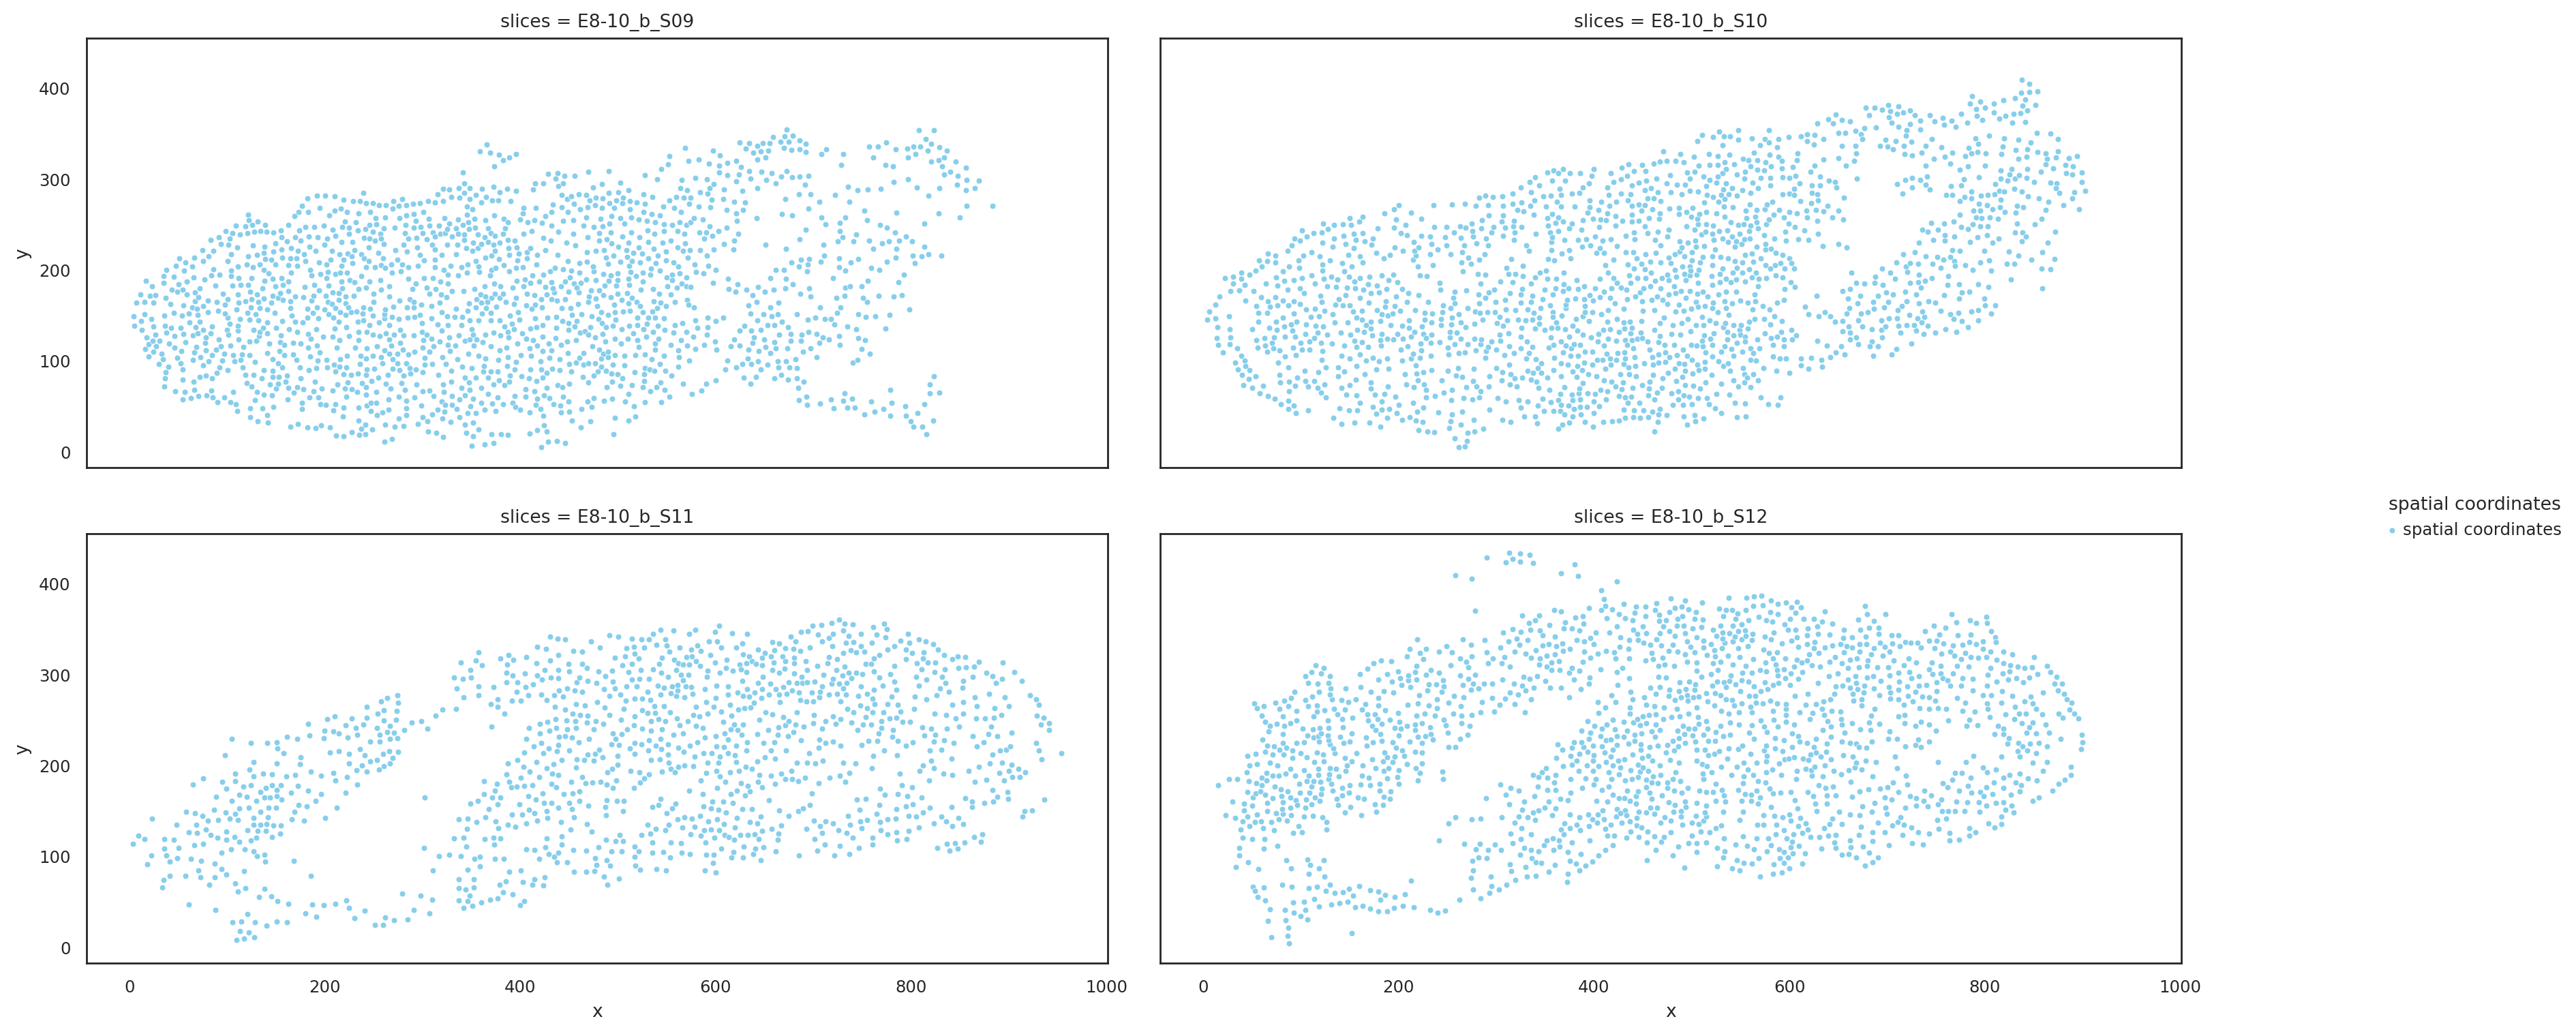

In [3]:
st.pl.multi_slices(
    slices=cellbin_slices,
    slices_key="slices",
    spatial_key="spatial",
    point_size=10,
    ncols=2,
)

### Slices alignment

In [4]:
aligned_slices, pis = st.align.paste_align(
    models=[slice.copy() for slice in cellbin_slices],
    spatial_key="spatial",
    key_added="align_spatial",
    device="0" # or device="cpu"
)

|-----> [Models alignment] in progress: 33.3333%|-----> Filtered all samples for common genes. There are 8334 common genes.
|-----> [Models alignment] in progress: 66.6667%|-----> Filtered all samples for common genes. There are 8257 common genes.
|-----> [Models alignment] in progress: 100.0000%|-----> Filtered all samples for common genes. There are 8251 common genes.
|-----> [Models alignment] in progress: 100.0000%
|-----> [Models alignment] finished [13.8075s]


### Visualize slices based on aligned coordinates

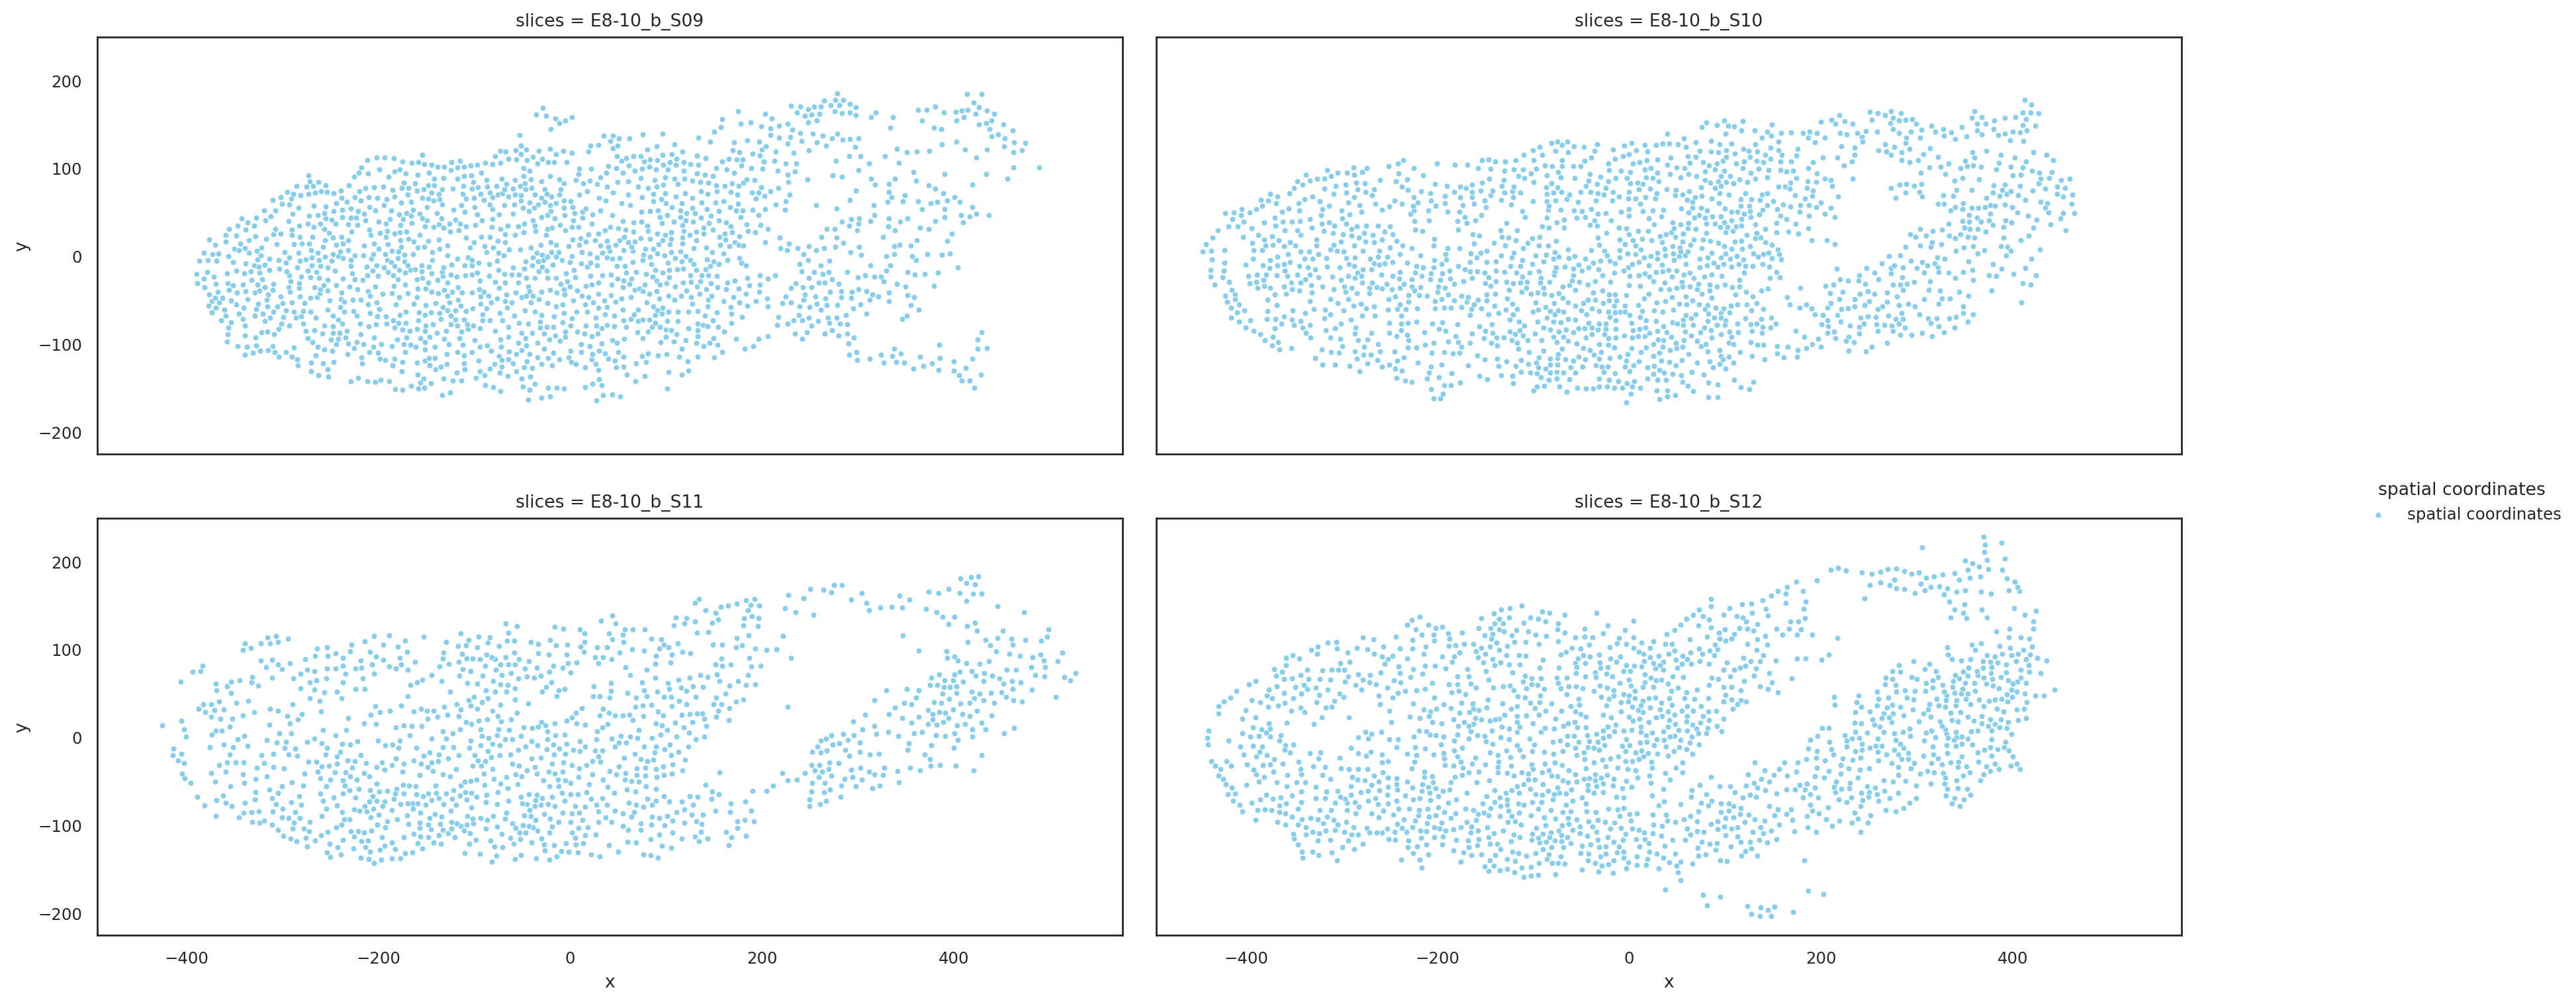

In [5]:
st.pl.multi_slices(
    slices=aligned_slices.copy(),
    slices_key="slices",
    spatial_key="align_spatial",
    point_size=10,
    ncols=2,
)

## Reduce the amount of data by down-sampling to improve alignment speed

### Slices alignment

In [6]:
aligned_slices, downsampling_slices, pis = st.align.paste_align_ref(
    models=[slice.copy() for slice in cellbin_slices],
    models_ref=None,
    n_sampling=500,
    sampling_method="trn",
    spatial_key="spatial",
    key_added="align_spatial",
    numItermax=400,
    device="0"
)

|-----> [Running TRN] in progress: 100.0000%|-----> [Running TRN] completed [19.5275s]
|-----> [Running TRN] in progress: 100.0000%|-----> [Running TRN] completed [19.2842s]
|-----> [Running TRN] in progress: 100.0000%|-----> [Running TRN] completed [19.7409s]
|-----> [Running TRN] in progress: 100.0000%|-----> [Running TRN] completed [19.7497s]
|-----> [Models alignment] in progress: 33.3333%|-----> Filtered all samples for common genes. There are 8334 common genes.
|-----> [Models alignment] in progress: 66.6667%|-----> Filtered all samples for common genes. There are 8257 common genes.
|-----> [Models alignment] in progress: 100.0000%|-----> Filtered all samples for common genes. There are 8251 common genes.
|-----> [Models alignment] in progress: 100.0000%
|-----> [Models alignment] finished [0.5662s]


### Visualize downsampling slices based on aligned coordinates

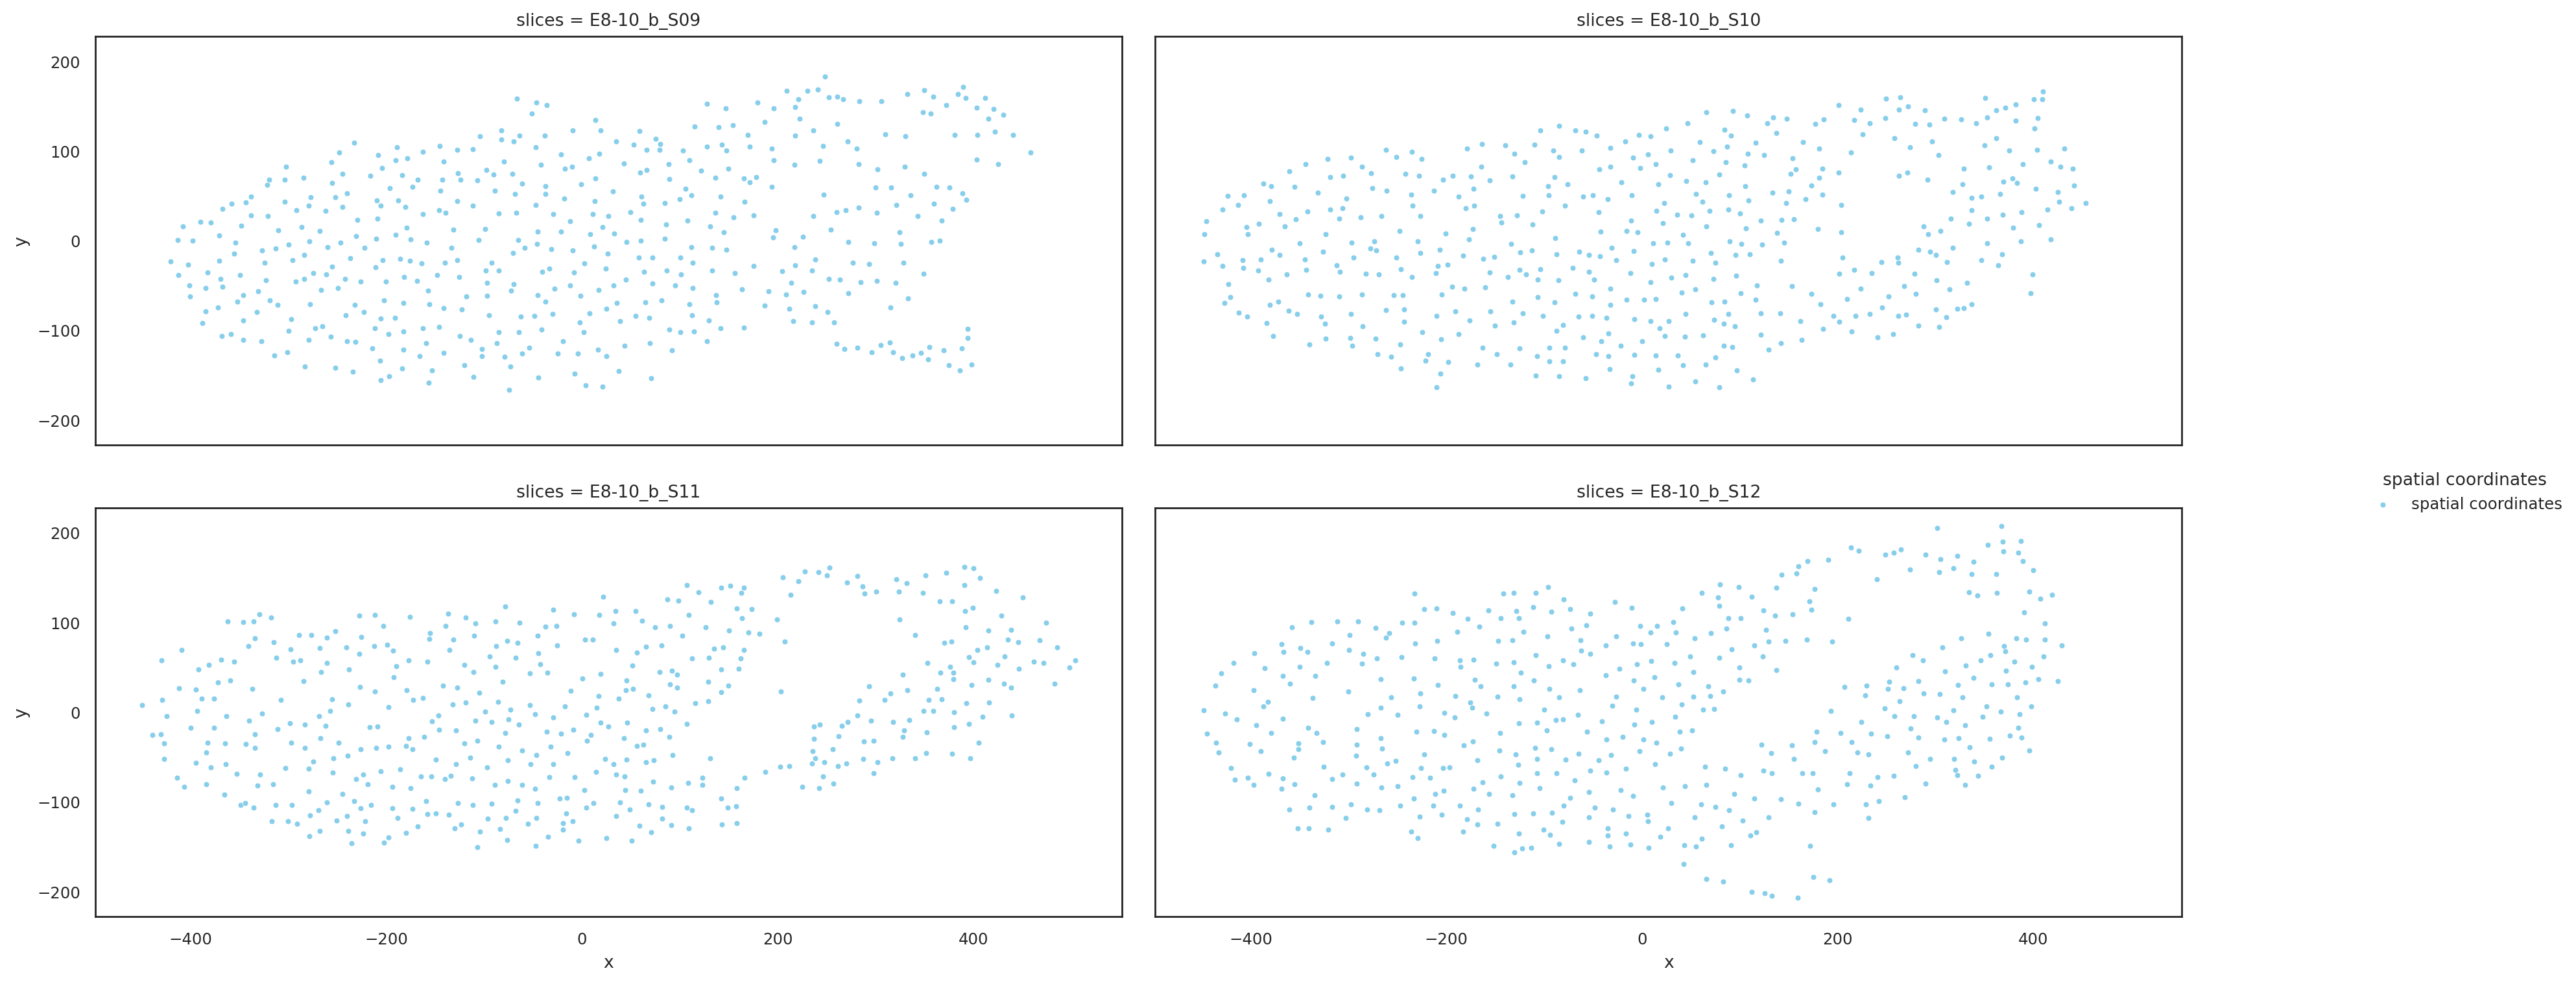

In [7]:
st.pl.multi_slices(
    slices=downsampling_slices.copy(),
    slices_key="slices",
    spatial_key="align_spatial",
    point_size=10,
    ncols=2,
)

### Visualize slices based on aligned coordinates

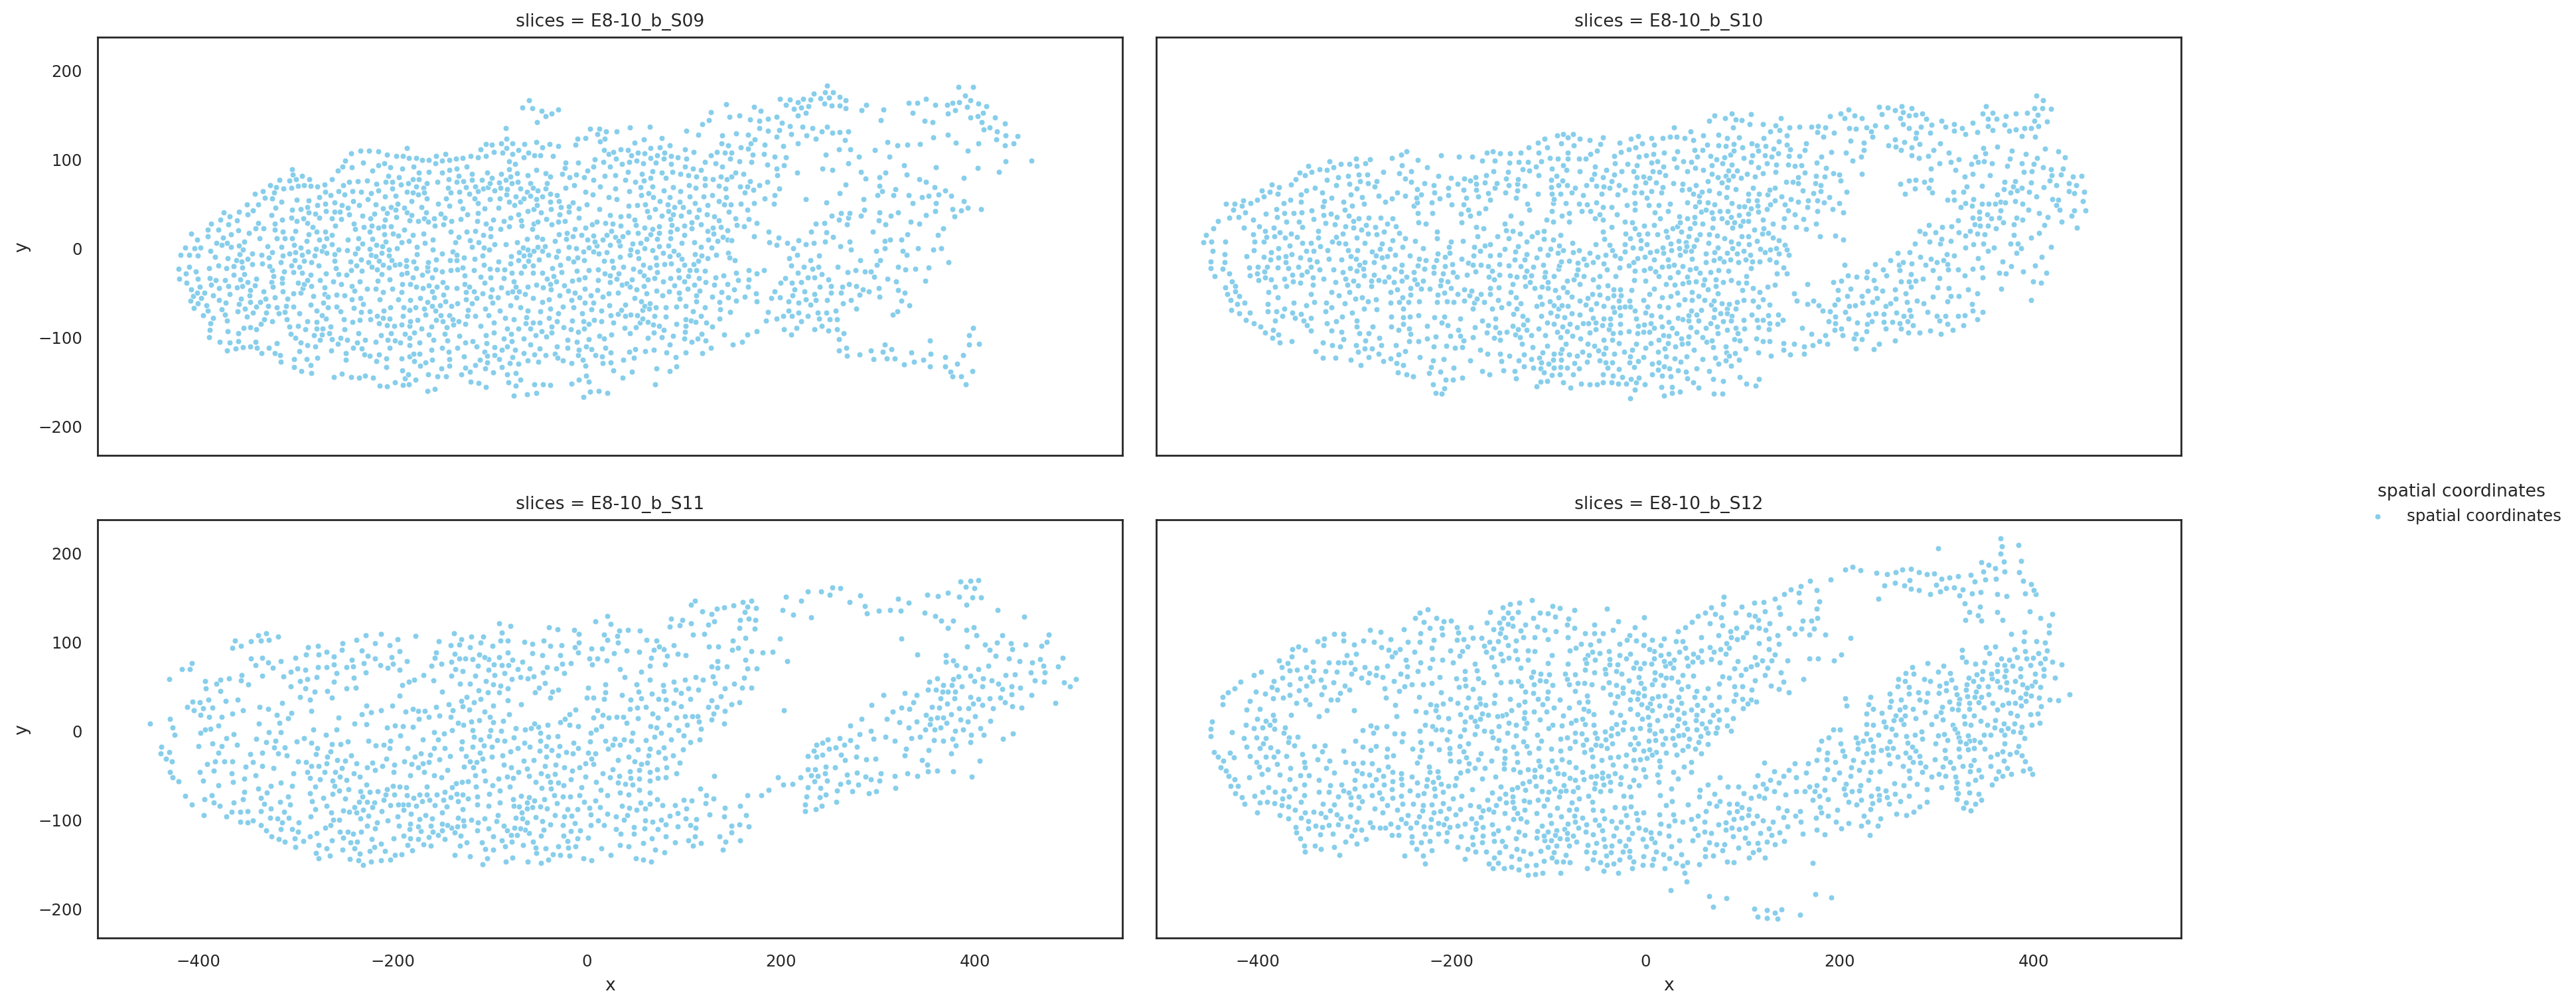

In [8]:
st.pl.multi_slices(
    slices=aligned_slices.copy(),
    slices_key="slices",
    spatial_key="align_spatial",
    point_size=10,
    ncols=2,
)